Importting dependencies

In [24]:
import matplotlib
matplotlib.use('nbagg')
import numpy as np
import pandas as pd
import quandl, math, datetime
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
import pickle

Importing Data

In [25]:
df = quandl.get('WIKI/GOOGL')

Data Processing

In [26]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100

df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [27]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

In [28]:
# amount of data to be used for forecasting
data_percentage_to_use = 0.1
forecast_out = int(math.ceil(data_percentage_to_use*len(df)))
print(forecast_out)

343


In [29]:
'''
basically using the forecast_out we are predicting the value of forcast_out days into the 
future for example to get forecast from the data of previous 10 days we will set the 
closing value of the 10th day in the futire as the label for the current day
''' 

df['label'] = df[forecast_col].shift(-forecast_out)

In [30]:
#getting the features as numpy array and seperating the label column
features = np.array(df.drop(['label'],1))

#normalizing the values for all the feature columns
features = preprocessing.scale(features)

#seperating related rows for the considered days and the rest of the data for features
x_lately = features[-forecast_out :]
features = features[: -forecast_out]

In [34]:
#seperating related rows for the considered days and the rest of the data for labels
df.dropna(inplace=True)
label = np.array(df['label'])


In [35]:
print(len(features), len(label))

3081 3081


In [36]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)

In [37]:
clf = LinearRegression(n_jobs=-1)

### Pickling the model or classifier

In [38]:
def save_pickle(x_train, y_train):
    clf.fit(x_train, y_train)
    with open('linearregression.pickle', 'wb') as f:
        pickle.dump(clf, f)

In [39]:
try:
    pickle_in = open('pickles/linearregression.pickle', 'rb')
    print('successfully loaded pickled model')

except:
    save_pickle(x_train, y_train)
    print('newly trained and saved model')
    
pickle_in = open('pickles/linearregression.pickle', 'rb')
print(pickle_in)
clf = pickle.load(pickle_in)

successfully loaded pickled model
<_io.BufferedReader name='pickles/linearregression.pickle'>


In [40]:
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.7299125369979289


In [41]:
forecast_set = clf.predict(x_lately)

In [42]:
print(forecast_set, accuracy, forecast_out)
df['Forecast'] = np.nan

[ 787.55550223  766.4208921   791.21864216  795.89731997  803.34468374
  791.77115835  801.87674873  801.9110909   794.89422499  798.00816944
  801.26032093  806.34696676  791.1828306   778.42015256  781.03923293
  794.91786641  792.65596501  807.63564483  812.14681301  826.58871426
  825.51555731  832.2426269   834.99835232  832.70726329  826.38605524
  829.72854413  833.12106435  829.31468832  827.61246226  825.72329264
  827.35296027  821.52878692  820.47818921  808.73498943  824.74340033
  825.00640777  830.7276538   841.85215653  844.7795971   843.90342393
  847.61376358  847.11603602  849.00214801  845.1714297   847.06376513
  841.89771169  846.23094365  861.26780908  867.25869454  876.35283013
  873.94650994  859.93223946  839.54151552  837.41652527  831.87524639
  835.32489798  837.752956    839.25617611  846.85829135  847.47060704
  848.06544379  852.79077921  857.09087429  858.04944621  855.3411572
  860.49209166  864.61459831  867.49546464  869.51401264  868.68292501
  865.9

In [43]:
# plotting the values on graph
style.use('ggplot')

In [44]:
# getting the date and populating the forecast_set
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

<IPython.core.display.Javascript object>


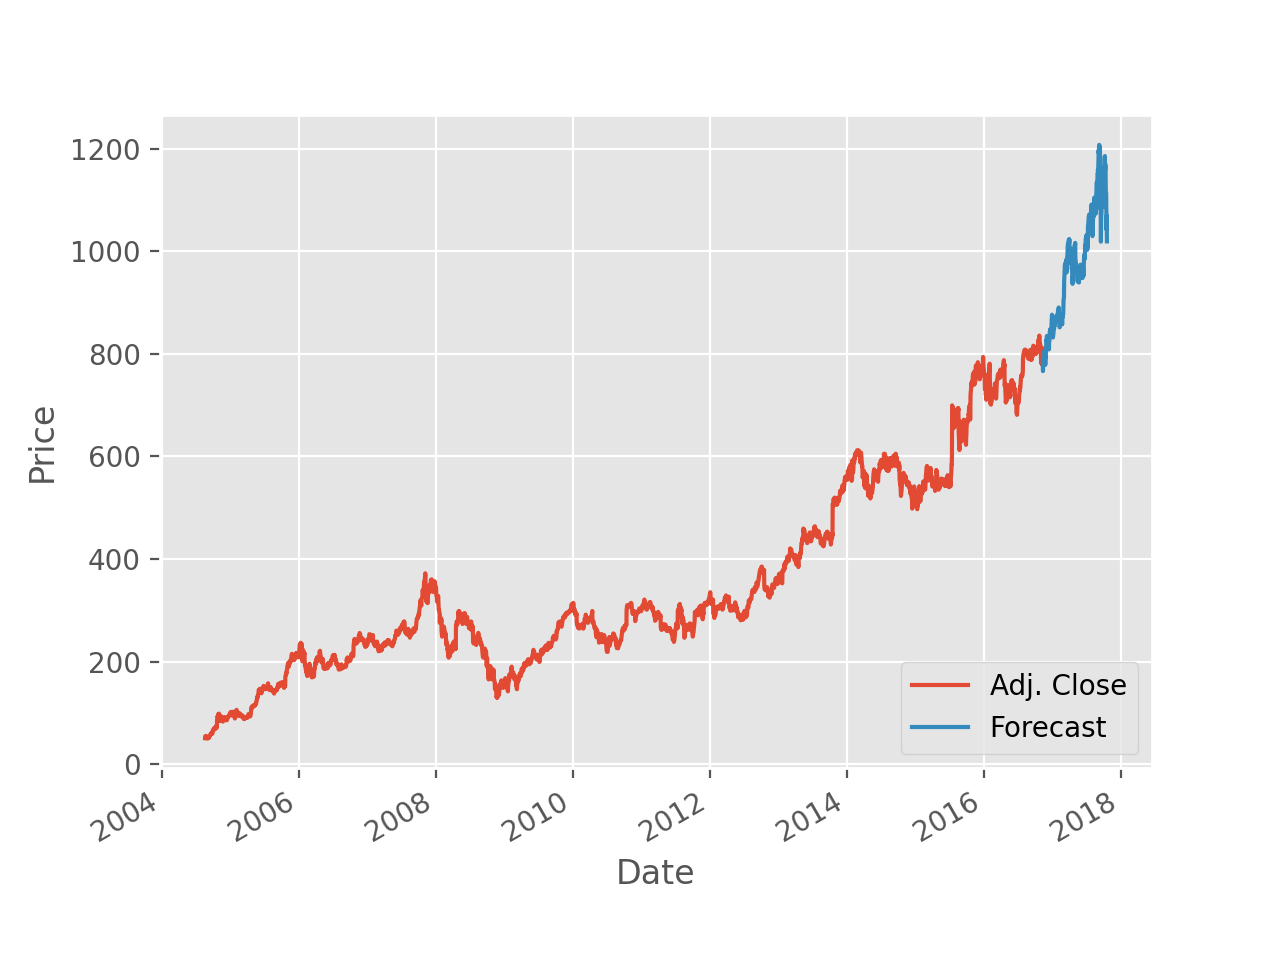

In [45]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc=4)
plt.show()

In [20]:
df.tail(forecast_out)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-03-28 09:00:00,NaN,NaN,NaN,NaN,NaN,787.555502
2018-03-29 09:00:00,NaN,NaN,NaN,NaN,NaN,766.420892
2018-03-30 09:00:00,NaN,NaN,NaN,NaN,NaN,791.218642
2018-03-31 09:00:00,NaN,NaN,NaN,NaN,NaN,795.897320
2018-04-01 09:00:00,NaN,NaN,NaN,NaN,NaN,803.344684
...,...,...,...,...,...,...
2019-03-01 09:00:00,NaN,NaN,NaN,NaN,NaN,1113.003400
2019-03-02 09:00:00,NaN,NaN,NaN,NaN,NaN,1069.605259
2019-03-03 09:00:00,NaN,NaN,NaN,NaN,NaN,1042.376413
